The purpose of this document is to put my data cleaning skills into practice. 

The Fifa data set was downloaded from the internet.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fifa.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  16155 non-null  int64  
 1   sofifa_id                   16155 non-null  int64  
 2   player_url                  16155 non-null  object 
 3   short_name                  16155 non-null  object 
 4   long_name                   16155 non-null  object 
 5   age                         16155 non-null  int64  
 6   dob                         16155 non-null  object 
 7   height_cm                   16155 non-null  int64  
 8   weight_kg                   16155 non-null  int64  
 9   nationality                 16155 non-null  object 
 10  club_name                   15916 non-null  object 
 11  league_name                 15916 non-null  object 
 12  league_rank                 15916 non-null  float64
 13  overall                     161

The values in this column suggests that these are just index numbers

In [4]:
df['Unnamed: 0'].unique()

array([    0,     1,     2, ..., 16152, 16153, 16154], dtype=int64)

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df[df.columns[df.isnull().any()]].isnull().sum()

club_name                 239
league_name               239
league_rank               239
release_clause_eur      16155
player_tags             14919
team_position             239
team_jersey_number        239
loaned_from             15243
joined                   1151
contract_valid_until      239
nation_position         15074
nation_jersey_number    15074
pace                     1775
shooting                 1775
passing                  1775
dribbling                1775
defending                1775
physic                   1775
gk_diving               14380
gk_handling             14380
gk_kicking              14380
gk_reflexes             14380
gk_speed                14380
gk_positioning          14380
player_traits            9556
mentality_composure     16155
dtype: int64

The columns 'release_clause_eur' and 'mentality_composure' does not contain any values at all. Hence, these columns can be dropped

In [7]:
df.drop(['release_clause_eur', 'mentality_composure'], axis=1, inplace=True)

The columns 'club_name', 'league_name', 'team_position', 'team_jersey_number' and 'contract_valid_until' are all related to the club that the player is identified with. If the club cannot be identified, the rest of the variables will be unknown

In [8]:
df[['club_name', 'league_name', 'team_position', 'team_jersey_number', 'contract_valid_until']] = df[['club_name', 'league_name', 'team_position', 'team_jersey_number', 'contract_valid_until']].fillna('Unidentified')

In [9]:
df[df.columns[df.isnull().any()]].isnull().sum()

league_rank               239
player_tags             14919
loaned_from             15243
joined                   1151
nation_position         15074
nation_jersey_number    15074
pace                     1775
shooting                 1775
passing                  1775
dribbling                1775
defending                1775
physic                   1775
gk_diving               14380
gk_handling             14380
gk_kicking              14380
gk_reflexes             14380
gk_speed                14380
gk_positioning          14380
player_traits            9556
dtype: int64

The columns 'nation_position' and 'nation_jersey_number' are related. These columns would also be related to the 'nationality' column as they are all related to nations

In [10]:
df[df['nation_position'].isna()]['nationality'].unique()

array(['Uruguay', 'France', 'Germany', 'Croatia', 'Spain', 'Argentina',
       'Morocco', 'Italy', 'Bosnia Herzegovina', 'England', 'Serbia',
       'Japan', 'Mexico', 'Slovakia', 'United States', 'Portugal',
       'Brazil', 'Poland', 'Algeria', 'Netherlands', 'Armenia', 'Turkey',
       'Montenegro', 'Cameroon', 'Bulgaria', 'Ivory Coast', 'Denmark',
       'Belgium', 'Nigeria', 'Venezuela', 'Ghana', 'Togo', 'Switzerland',
       'Senegal', 'Tunisia', 'Sweden', 'Gabon', 'Costa Rica',
       'South Africa', 'Russia', 'Paraguay', 'Colombia', 'Ukraine',
       'Austria', 'Canada', 'North Macedonia', 'Chile', 'Romania',
       'Iceland', 'Guinea', 'Mali', 'Congo', 'Albania', 'Benin',
       'Hungary', 'Israel', 'DR Congo', 'Republic of Ireland',
       'Australia', 'Czech Republic', 'Norway', 'Cuba', 'Saudi Arabia',
       'Georgia', 'Greece', 'Kenya', 'Mozambique', 'Burkina Faso',
       'Scotland', 'Lithuania', 'Iran', 'Egypt', 'Cape Verde', 'Latvia',
       'Uzbekistan', 'Estonia', 'Om

In [11]:
df[df['nationality'] == 'Uruguay']['nation_position'].unique()

array([nan, 'LS', 'LCB', 'GK', 'LB', 'LM', 'RS', 'SUB', 'CAM', 'RB', 'RM',
       'CDM', 'RCB'], dtype=object)

In [12]:
df[df['nationality'] == 'France']['nation_jersey_number'].unique()

array([nan, 10.,  1., 19., 14., 16., 11., 23.,  4.,  5.,  6.,  8., 13.,
       22., 20.,  3., 21., 12.,  2., 15.,  7.,  9., 17., 18.])

As shown from the findings above, the nation position and nation jersey number does not have a hard value tied to a particular nationality. Hence, a unique value cannot be identified for the diff. nations

In [13]:
df[['nation_position', 'nation_jersey_number']] = df[['nation_position', 'nation_jersey_number']].fillna('Unidentified')

In [14]:
df[df.columns[df.isnull().any()]].isnull().sum()

league_rank         239
player_tags       14919
loaned_from       15243
joined             1151
pace               1775
shooting           1775
passing            1775
dribbling          1775
defending          1775
physic             1775
gk_diving         14380
gk_handling       14380
gk_kicking        14380
gk_reflexes       14380
gk_speed          14380
gk_positioning    14380
player_traits      9556
dtype: int64

In [15]:
df['gk_diving'].describe()

count    1775.000000
mean       64.624789
std         7.779809
min        35.000000
25%        59.000000
50%        64.000000
75%        69.000000
max        88.000000
Name: gk_diving, dtype: float64

In [16]:
df['goalkeeping_diving'].describe()

count    16155.000000
mean        15.869514
std         17.576799
min          1.000000
25%          8.000000
50%         11.000000
75%         13.000000
max         88.000000
Name: goalkeeping_diving, dtype: float64

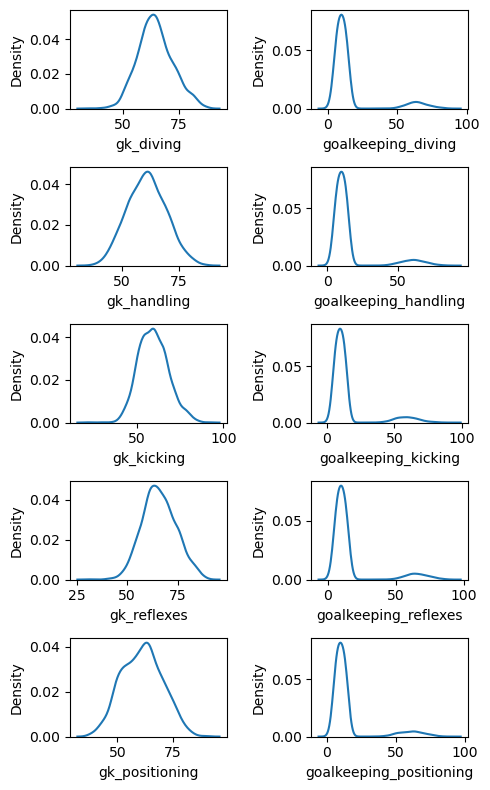

In [17]:
fig, axes = plt.subplots(5, 2, dpi=100, figsize=(5,8))

gk = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_positioning']
goalkeeping = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_reflexes', 'goalkeeping_positioning']

for i in range(len(gk)):
    
    # to plot the values in gk
    sns.kdeplot(ax=axes[i,0], x=gk[i], data=df)
    #axes[i,0].set_title(gk[i])
    
    # to plot the values in goalkeeping
    sns.kdeplot(ax=axes[i,1], x=goalkeeping[i], data=df)
    #axes[i,1].set_title(goalkeeping[i])
    
plt.tight_layout()

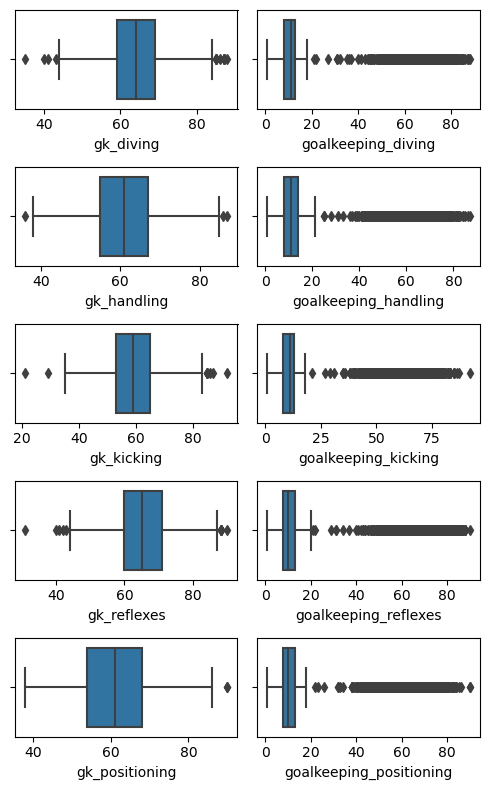

In [18]:
fig, axes = plt.subplots(5, 2, dpi=100, figsize=(5,8))

gk = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_positioning']
goalkeeping = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_reflexes', 'goalkeeping_positioning']

for i in range(len(gk)):
    
    # to plot the values in gk
    sns.boxplot(ax=axes[i,0], x=gk[i], data=df)
    #axes[i,0].set_title(gk[i])
    
    # to plot the values in goalkeeping
    sns.boxplot(ax=axes[i,1], x=goalkeeping[i], data=df)
    #axes[i,1].set_title(goalkeeping[i])
    
plt.tight_layout()

From the charts and tables above, it seems that values in the goalkeeping columns are very skewed to the right despite those two lists containing similar scoring attributes - both are on goalkeeping scores. Additionally, the range of values for gk and goalkeeping columns vary (i.e. don't belong to the same range)

Next step is to conduct a check on other columns with scores to see if there is a particular score range for the attributes to make the job easier, we will find out the columns that contain numerical values

In [19]:
checklist = list(df.select_dtypes(exclude='object').columns)
pd.set_option('display.max_columns', None)
df[checklist].describe()

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,16155.000000,16155.000000,16155.000000,16155.000000,15916.000000,16155.000000,16155.000000,1.615500e+04,16155.000000,16155.000000,16155.000000,16155.000000,14380.000000,14380.000000,14380.000000,14380.000000,14380.000000,14380.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000
mean,189284.184525,24.776230,181.083627,75.474342,1.378424,63.830393,68.350108,1.060882e+06,13056.453110,1.122501,2.929619,2.265429,68.049026,51.582337,55.638665,60.525661,49.896662,64.537830,64.624789,60.765634,59.375211,65.852394,43.865915,61.147042,49.915877,45.892355,53.193377,56.907026,44.229403,54.527700,47.532343,44.354132,51.565583,57.607985,65.117858,65.585515,63.184958,60.646301,63.852553,55.978892,65.072609,63.417456,65.095574,48.329124,55.395543,46.879418,50.113278,50.765645,49.648344,45.009037,47.656639,45.885918,15.869514,15.511668,15.354875,15.504735,15.998514
std,39749.261554,4.625321,6.618974,6.891796,0.736796,7.169896,6.580610,2.819128e+06,23488.182571,0.396263,0.650281,0.717399,10.965779,13.401158,10.725853,10.758680,15.788470,9.700209,7.779809,8.461082,8.640448,8.319891,8.484421,9.134613,15.772594,16.631994,14.759745,14.510707,15.304337,16.193951,16.105431,15.642168,14.867562,15.239856,13.689466,13.281079,14.271756,9.542055,13.389376,16.078853,11.620670,15.195508,12.616545,16.585339,16.814330,18.278554,16.395071,15.098199,14.552244,17.915206,18.743105,18.145497,17.576799,16.414173,16.010498,16.585081,17.983209
min,2.000000,16.000000,155.000000,50.000000,1.000000,40.000000,40.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,22.000000,22.000000,24.000000,25.000000,21.000000,28.000000,35.000000,36.000000,21.000000,31.000000,20.000000,38.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,21.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,178042.500000,21.000000,176.000000,70.000000,1.000000,59.000000,64.000000,1.200000e+05,2000.000000,1.000000,3.000000,2.000000,62.000000,41.000000,49.000000,54.000000,33.000000,58.000000,59.000000,55.000000,53.000000,60.000000,39.000000,54.000000,37.000000,29.000000,45.000000,50.000000,30.000000,45.000000,34.000000,31.000000,41.000000,52.000000,56.500000,57.000000,56.000000,54.000000,56.000000,46.000000,58.000000,56.000000,58.000000,33.000000,43.000000,25.000000,37.000000,41.000000,39.000000,25.000000,25.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,200841.000000,24.000000,181.000000,75.000000,1.000000,64.000000,68.00000

Upon exploring the other attributes such as movement, power, mentality, defending. It can be deduced that the 'goalkeeping' columns contain oddly low min. scores and very wide range. Hence, the 'goalkeeping' columns should be dropped given its abnormality.

In [20]:
df.drop(['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_reflexes', 'goalkeeping_positioning'], axis=1, inplace=True)

Now that the 'goalkeeping' columns have been dropped, we have to deal with the null values in the 'columns'

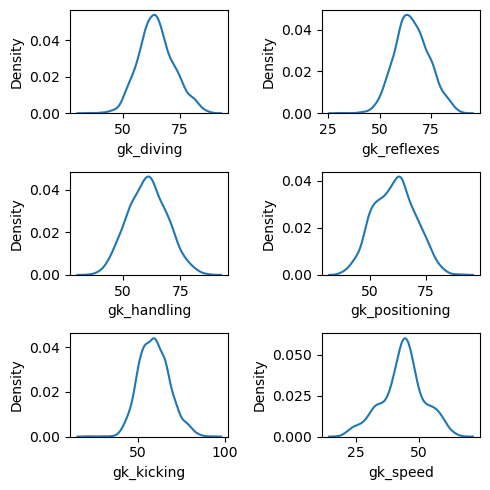

In [22]:
fig, axes = plt.subplots(3, 2, dpi=100, figsize=(5,5))

gk1 = ['gk_diving', 'gk_handling', 'gk_kicking']
gk2 = ['gk_reflexes', 'gk_positioning', 'gk_speed']

for i in range(len(gk1)):
    
    # to plot the values in gk1
    sns.kdeplot(ax=axes[i,0], x=gk1[i], data=df)
    
    # to plot the values in gk2
    sns.kdeplot(ax=axes[i,1], x=gk2[i], data=df)
    
plt.tight_layout()

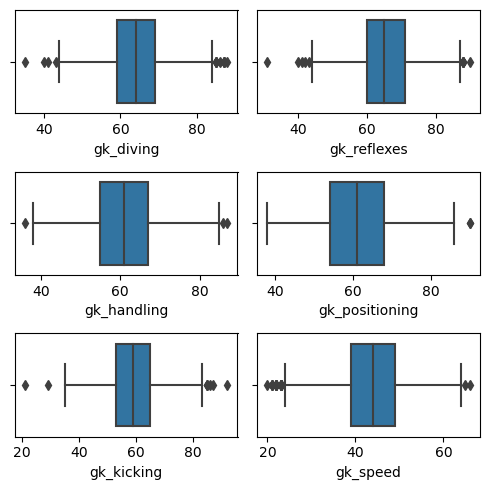

In [23]:
fig, axes = plt.subplots(3, 2, dpi=100, figsize=(5,5))

gk1 = ['gk_diving', 'gk_handling', 'gk_kicking']
gk2 = ['gk_reflexes', 'gk_positioning', 'gk_speed']

for i in range(len(gk1)):
    
    # to plot the values in gk1
    sns.boxplot(ax=axes[i,0], x=gk1[i], data=df)
    
    # to plot the values in gk2
    sns.boxplot(ax=axes[i,1], x=gk2[i], data=df)
    
plt.tight_layout()

In [24]:
df[gk1+gk2].describe()

,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_positioning,gk_speed
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,64.624789,60.765634,59.375211,65.852394,61.147042,43.865915
std,7.779809,8.461082,8.640448,8.319891,9.134613,8.484421
min,35.000000,36.000000,21.000000,31.000000,38.000000,20.000000
25%,59.000000,55.000000,53.000000,60.000000,54.000000,39.000000
50%,64.000000,61.000000,59.000000,65.000000,61.000000,44.000000
75%,69.000000,67.000000,65.000000,71.000000,68.000000,49.000000
max,88.000000,87.000000,92.000000,90.000000,90.000000,66.000000


As the distribution of the 'gk' attributes are mostly fairly normally distributed, we will use the mean to replace the null values in these columns.

In [25]:
df[gk1+gk2] = df[gk1+gk2].fillna(df[gk1+gk2].mean())

In [26]:
df[df.columns[df.isnull().any()]].isnull().sum()

league_rank        239
player_tags      14919
loaned_from      15243
joined            1151
pace              1775
shooting          1775
passing           1775
dribbling         1775
defending         1775
physic            1775
player_traits     9556
dtype: int64

In [27]:
df['joined'].unique()

array(['2004-07-01', '2009-07-01', '2009-08-28', ..., '2014-03-16',
       '2013-11-16', '2006-06-26'], dtype=object)

In [28]:
df['contract_valid_until'].unique()

array([2018.0, 2017.0, 2016.0, 2019.0, 2015.0, 2020.0, 2021.0,
       'Unidentified', 2014.0], dtype=object)

In [29]:
# as nan is inside the 'joined' column, we are unable to find the avg. tenure of contracts for the players 

df['joined'].str[:4].astype(int)

ValueError: cannot convert float NaN to integer

In [30]:
df2 = df[df['joined'].notnull()]

In [31]:
df2['contract_length'] = df2['contract_valid_until'] - df2['joined'].str[:4].astype(int)

C:\Users\keroy\AppData\Local\Temp/ipykernel_12032/2615950963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['contract_length'] = df2['contract_valid_until'] - df2['joined'].str[:4].astype(int)


In [32]:
df2['contract_length'].unique()

array([14.0, 9.0, 8.0, 4.0, 5.0, 16.0, 10.0, 6.0, 12.0, 11.0, 23.0, 7.0,
       15.0, 3.0, 18.0, 2.0, 17.0, 1.0, 13.0, 21.0, 19.0, 20.0, 22.0],
      dtype=object)

In [33]:
df2['contract_length'] = df2['contract_length'].astype(int)

C:\Users\keroy\AppData\Local\Temp/ipykernel_12032/1238866753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['contract_length'] = df2['contract_length'].astype(int)


In [34]:
df2.describe()['contract_length']

count    15004.000000
mean         4.710411
std          2.845751
min          1.000000
25%          3.000000
50%          4.000000
75%          7.000000
max         23.000000
Name: contract_length, dtype: float64

<AxesSubplot:xlabel='contract_length'>

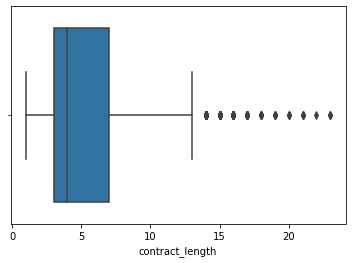

In [35]:
sns.boxplot(data=df2, x='contract_length')

The kdeplot and boxplot has shown that the df2 data set is right-tailed. Hence, the mean may not be a good indication as it is affected by the extreme data values.

<AxesSubplot:xlabel='contract_length', ylabel='Density'>

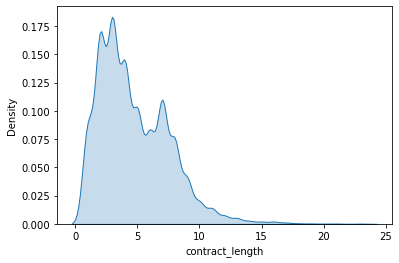

In [36]:
sns.kdeplot(data=df2, x='contract_length', shade='fill')

The mode of the data is 3 years.

In [37]:
df2['contract_length'].mode()

0    3
dtype: int32

The median of the data is 4 years. Given that the median is between the mode and mean (in a right-tailed distribution), we will use the median.

In [38]:
df2['contract_length'].median()

4.0

Filling all the 'joined' column that we can by deducting 4 years from the year in 'contract_valid_until'.

In [39]:
df.loc[(df['contract_valid_until'] != 'Unidentified') & (df['joined'].isnull()), 'joined'] = (df[(df['contract_valid_until'] != 'Unidentified') & (df['joined'].isnull())]['contract_valid_until'] - 4).astype(str) + '-01-01'

In [40]:
df[df.columns[df.isnull().any()]].isnull().sum()

league_rank        239
player_tags      14919
loaned_from      15243
joined             239
pace              1775
shooting          1775
passing           1775
dribbling         1775
defending         1775
physic            1775
player_traits     9556
dtype: int64

Filling the remaining rows that we are unable to fill with.

In [41]:
df.loc[df['joined'].isnull(), 'joined'] = 'Unidentified'

In [42]:
df[df.columns[df.isnull().any()]].isnull().sum()

league_rank        239
player_tags      14919
loaned_from      15243
pace              1775
shooting          1775
passing           1775
dribbling         1775
defending         1775
physic            1775
player_traits     9556
dtype: int64

This column seems to contain remarks. Since we can't statistically fill up a remark, we can indicate the null values as 'No Remarks'.

In [43]:
df['player_traits'].unique()

array(['Finesse Shot, Speed Dribbler (AI), One Club Player, Team Player',
       'Power Free-Kick, Flair, Long Shot Taker (AI), Speed Dribbler (AI)',
       'Diver, Injury Prone, Avoids Using Weaker Foot, Selfish, Long Shot Taker (AI), Speed Dribbler (AI), Chip Shot (AI)',
       'Power Free-Kick, Leadership, Flair, Long Shot Taker (AI), Technical Dribbler (AI)',
       'GK Up for Corners, GK Long Throw, 1-on-1 Rush',
       'Diver, Beat Offside Trap, Selfish, Flair, Technical Dribbler (AI)',
       'Finesse Shot, Playmaker (AI), Technical Dribbler (AI)',
       'Injury Free, Selfish, Finesse Shot, Flair, Playmaker (AI), Technical Dribbler (AI)',
       'Injury Prone, Flair, Long Shot Taker (AI), Technical Dribbler (AI)',
       'Injury Prone, Leadership, Playmaker (AI), One Club Player',
       'Injury Prone, Flair, Speed Dribbler (AI)',
       'Finesse Shot, Power Header',
       'Avoids Using Weaker Foot, Long Shot Taker (AI), Speed Dribbler (AI), Chip Shot (AI)',
       'Injury Fre

In [44]:
df.loc[df['player_traits'].isnull(), 'player_traits'] = 'No Remarks'

In [45]:
df[df.columns[df.isnull().any()]].isnull().sum()

league_rank      239
player_tags    14919
loaned_from    15243
pace            1775
shooting        1775
passing         1775
dribbling       1775
defending       1775
physic          1775
dtype: int64

This column seems to contain tags. Since we can't statistically fill up a tag, we can indicate the null values as 'No Tags'.

In [46]:
df['player_tags'].unique()

array(['#Speedster, #Dribbler, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Forward',
       '#Speedster, #Dribbler, #Distance Shooter, #Acrobat, #Clinical Finisher, #Complete Forward',
       '#Speedster, #Dribbler, #Distance Shooter, #Acrobat',
       '#Poacher, #Aerial Threat, #Distance Shooter, #Acrobat, #Strength, #Clinical Finisher, #Complete Forward',
       nan, '#Acrobat, #Clinical Finisher', '#Dribbler, #Playmaker',
       '#Speedster, #Dribbler, #Acrobat',
       '#Distance Shooter, #Clinical Finisher',
       '#Playmaker, #Engine, #Tactician', '#Dribbler, #Acrobat',
       '#Aerial Threat', '#Speedster, #Distance Shooter',
       '#Clinical Finisher', '#Engine, #Tackling, #Tactician',
       '#Tackling, #Tactician', '#Dribbler, #Playmaker, #Acrobat',
       '#Aerial Threat, #Tackling, #Tactician, #Strength, #Complete Defender',
       '#Speedster, #Dribbler, #Crosser, #Acrobat',
       '#Speedster, #Dribbler, #Distance Shooter, #FK Specialist, #Acrobat',
       '

In [47]:
df.loc[df['player_tags'].isnull(), 'player_tags'] = 'No Tags'

In [48]:
df[df.columns[df.isnull().any()]].isnull().sum()

league_rank      239
loaned_from    15243
pace            1775
shooting        1775
passing         1775
dribbling       1775
defending       1775
physic          1775
dtype: int64

In [49]:
df['loaned_from'].unique()

array([nan, 'AS Monaco', 'Manchester City', 'Manchester United',
       'Chelsea', 'SL Benfica', 'FC Barcelona', 'Valencia CF',
       'FC Schalke 04', 'Atlético Madrid', 'Cagliari', 'Rubin Kazan',
       'Newcastle United', 'Swansea City', 'FC Porto',
       'Toulouse Football Club', 'Udinese', 'Bayer 04 Leverkusen',
       'Napoli', 'Tottenham Hotspur', 'Southampton',
       'Zenit St. Petersburg', 'Galatasaray SK', 'Fulham', 'Palermo',
       'Juventus', 'Liverpool', 'Real Madrid', 'PSV', 'Inter',
       'PFC CSKA Moscow', 'RC Celta', 'Real Valladolid CF', 'Sevilla FC',
       'Milan', 'Spartak Moscow', 'Roma', 'Sporting CP',
       'Borussia Dortmund', 'KRC Genk', 'PAOK', 'Beşiktaş JK',
       'Fiorentina', 'FC Bayern München', 'SC Braga', 'Villarreal CF',
       'Arsenal', 'Real Betis', 'Universidad Católica', 'Guadalajara',
       'RCD Espanyol', 'Norwich City', 'Granada CF', 'Elche CF',
       'Real Sociedad', 'Catania', '1. FSV Mainz 05',
       'Olympique de Marseille', 'Real 

The values in the 'loaned_from' column contains names of football clubs. The null values probably means that either the player is not loaned from another football club or no record is available for the player.

We will assume that these players were not loaned from another football club.

We will assume that they joined the club they now belong in from the beginning.

In [50]:
df['loaned_from'] = df['loaned_from'].fillna('Not Loaned')

In [51]:
df[df.columns[df.isnull().any()]].isnull().sum()

league_rank     239
pace           1775
shooting       1775
passing        1775
dribbling      1775
defending      1775
physic         1775
dtype: int64

In [52]:
df[df['league_rank'].isnull()]['league_name'].value_counts()

Unidentified    239
Name: league_name, dtype: int64

The above has shown that results with unidentified league name also has unknown league rank. Thus, we can replace the null values in 'league_rank' with 'Unidentified' too.

In [53]:
df['league_rank'] = df['league_rank'].fillna('Unidentified')

In [54]:
df[df.columns[df.isnull().any()]].isnull().sum()

pace         1775
shooting     1775
passing      1775
dribbling    1775
defending    1775
physic       1775
dtype: int64

The below charts are to look at the dist. of scores for 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'. 

It is to find out if the scores are normally distributed.

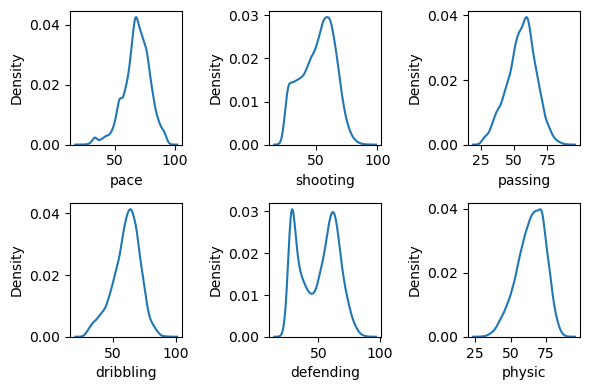

In [56]:
fig, axes = plt.subplots(2, 3, dpi=(100))

scores1 = ['pace', 'shooting', 'passing']
scores2 = ['dribbling', 'defending', 'physic']

for i in range(len(scores1)):
    sns.kdeplot(ax=axes[0,i], x=scores1[i], data=df)
    
    sns.kdeplot(ax=axes[1,i], x=scores2[i], data=df)
    
plt.tight_layout()

From the charts above, we can deduce that 'dribbling' and 'passing' are more normally distributed compared to the rest. Thus, we can replace the null values with the mean as a gauge

For 'pace', 'physic' and 'shooting', we can replace the null values with the median as these are not so normally distributed.

For 'defending', the distribution is bimodal, hence, this suggests that there are two groups of players - one group that is very good at defending, and another not so good at defending.

In [58]:
df['dribbling'] = df['dribbling'].fillna(df['dribbling'].mean())
df['passing'] = df['passing'].fillna(df['passing'].mean())

df['pace'] = df['pace'].fillna(df['pace'].median())
df['physic'] = df['physic'].fillna(df['physic'].median())
df['shooting'] = df['shooting'].fillna(df['shooting'].median())

In [59]:
df[df.columns[df.isnull().any()]].isnull().sum()

defending    1775
dtype: int64

In [60]:
df['defending'].describe()

count    14380.000000
mean        49.896662
std         15.788470
min         21.000000
25%         33.000000
50%         53.000000
75%         63.000000
max         90.000000
Name: defending, dtype: float64

<AxesSubplot:xlabel='defending'>

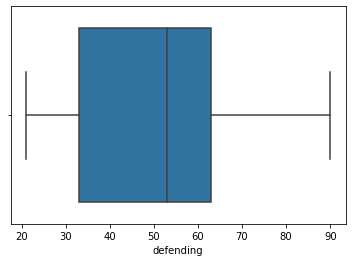

In [61]:
sns.boxplot(data=df, x='defending')

The stats description and boxplot above have shown that there are very high scores given for this feature (right-tailed). However, there are no outliers as the dist. is bimodal, our best guess is to take the mean to replace the null values.

In [62]:
df['defending'] = df['defending'].fillna(df['defending'].mean())

All columns with null values have been dealt with.

In [63]:
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

Checking for other columns that contain outliers

In [65]:
checklist = list(df.select_dtypes(exclude='object').columns)
df[checklist].describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,1.615500e+04,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000
mean,189284.184525,24.776230,181.083627,75.474342,63.830393,68.350108,1.060882e+06,13056.453110,1.122501,2.929619,2.265429,68.153513,51.738100,55.638665,60.525661,49.896662,64.588610,64.624789,60.765634,59.375211,65.852394,43.865915,61.147042,49.915877,45.892355,53.193377,56.907026,44.229403,54.527700,47.532343,44.354132,51.565583,57.607985,65.117858,65.585515,63.184958,60.646301,63.852553,55.978892,65.072609,63.417456,65.095574,48.329124,55.395543,46.879418,50.113278,50.765645,49.648344,45.009037,47.656639,45.885918
std,39749.261554,4.625321,6.618974,6.891796,7.169896,6.580610,2.819128e+06,23488.182571,0.396263,0.650281,0.717399,10.350067,12.651251,10.119432,10.150403,14.895818,9.152918,2.578135,2.803901,2.863341,2.757112,2.811635,3.027101,15.772594,16.631994,14.759745,14.510707,15.304337,16.193951,16.105431,15.642168,14.867562,15.239856,13.689466,13.281079,14.271756,9.542055,13.389376,16.078853,11.620670,15.195508,12.616545,16.585339,16.814330,18.278554,16.395071,15.098199,14.552244,17.915206,18.743105,18.145497
min,2.000000,16.000000,155.000000,50.000000,40.000000,40.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,22.000000,22.000000,24.000000,25.000000,21.000000,28.000000,35.000000,36.000000,21.000000,31.000000,20.000000,38.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,21.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
25%,178042.500000,21.000000,176.000000,70.000000,59.000000,64.000000,1.200000e+05,2000.000000,1.000000,3.000000,2.000000,63.000000,43.000000,50.000000,55.000000,35.000000,59.000000,64.624789,60.765634,59.375211,65.852394,43.865915,61.147042,37.000000,29.000000,45.000000,50.000000,30.000000,45.000000,34.000000,31.000000,41.000000,52.000000,56.500000,57.000000,56.000000,54.000000,56.000000,46.000000,58.000000,56.000000,58.000000,33.000000,43.000000,25.000000,37.000000,41.000000,39.000000,25.000000,25.000000,25.000000
50%,200841.000000,24.000000,181.000000,75.000000,64.000000,68.000000,3.500000e+05,5000.000000,1.000000,3.000000,2.000000,69.000000,53.000000,55.638665,60.525661,49.896662,65.000000,64.624789,60.765634,59.375211,65.852394,43.865915,61.147042,52.000000,47.000000,55.000000,60.000000,44.000000,58.000000,48.000000,42.000000,54.000000,61.000000,67.000000,68.000000,65.000000,61.000000,65.000000,59.000000,65.000000,66.000000,66.000000,51.000000,58.000000,50.000000,53.000000,52.000000,50.000000,

From the table above, 'value_eur' amd 'wage_eur' contains abnormal value as having a value and wage of $0 is odd.

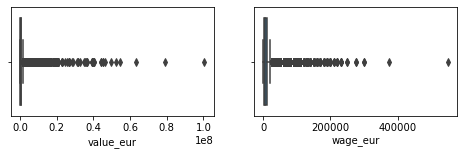

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(8,2))

eur_check = ['value_eur', 'wage_eur']

for i in range(len(eur_check)):
    sns.boxplot(ax=axes[i], data=df, x=eur_check[i])

Based on the boxplots above, the data available is oddly distributed and there are a lot of outliers.

In [68]:
len(df[df['value_eur'] == 0])

311

In [69]:
len(df[df['wage_eur'] == 0])

239

In [70]:
len(df[(df['value_eur'] == 0) & (df['wage_eur'] == 0)])

239

In [71]:
len(df[(df['value_eur'] == 0) & (df['wage_eur'] == 0) & (df['club_name'] == 'Unidentified')])

239

The results above have shown that most records that have a $0 value for 'value_eur' and 'wage_eur' do not have much info on the players, e.g. have unidentified club name etc.

<AxesSubplot:>

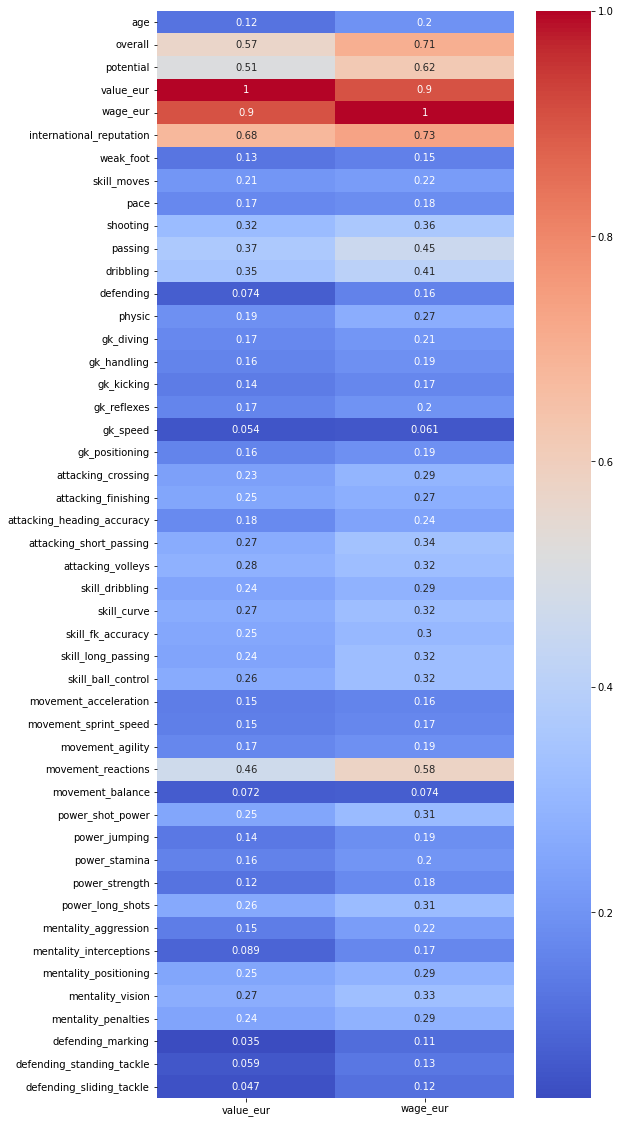

In [72]:
# removing variables that are unlikely correlated with the value and wage of players

checklist = list(df.select_dtypes(exclude='object').columns)

wage_value_remove = ['sofifa_id', 'height_cm', 'weight_kg']

for i in range(len(wage_value_remove)):
    checklist.remove(wage_value_remove[i])

plt.figure(figsize=(8,20))
sns.heatmap(df[checklist].corr()[['value_eur', 'wage_eur']], cmap='coolwarm', annot=True)

The heatmap above shows that most of the scoring variables are weakly correlated to the value and wage of players.
The most closely related variables to players' value is 'international_reputation'.
Whears, the most closely related variables to players' value are 'international_reputation', 'overall' and 'potential'

To predict the currently null player's value and wage, a regression model can help given that there are some correlated variables with a player's value and wages.

Below charts are used to explore the relationship between variables.

In [87]:
df_no_zero = df[df['value_eur'] != 0]

<AxesSubplot:xlabel='international_reputation', ylabel='value_eur'>

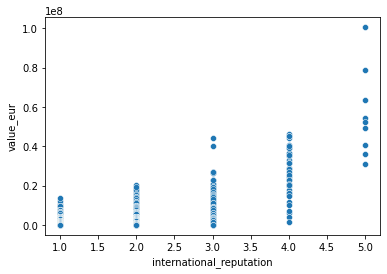

In [88]:
sns.scatterplot(data=df_no_zero, x='international_reputation', y='value_eur')

<AxesSubplot:xlabel='international_reputation', ylabel='wage_eur'>

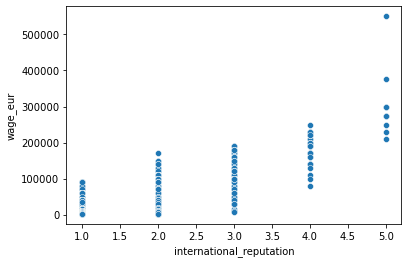

In [89]:
sns.scatterplot(data=df_no_zero, x='international_reputation', y='wage_eur')

<AxesSubplot:xlabel='overall', ylabel='wage_eur'>

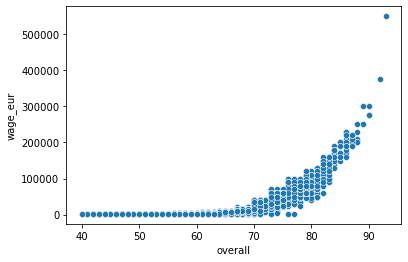

In [90]:
sns.scatterplot(data=df_no_zero, x='overall', y='wage_eur')

<AxesSubplot:xlabel='potential', ylabel='wage_eur'>

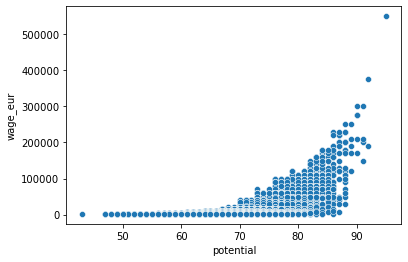

In [91]:
sns.scatterplot(data=df_no_zero, x='potential', y='wage_eur')

From the charts above, the relationship seems exponential between 'overall' and 'wage_eur'; 'potential' and 'wage_eur'.
Whereas between 'international_reputation' and 'value_eur' / 'wage_eur' do not have any clear relationship.

Thus, there is no variable available that can help us predict the values for 'value_eur'.

Using 'overall' for curve fitting with 'wage_eur' since it has a higher correlation with 'wage_eur'.

Learning from https://www.youtube.com/watch?v=1H-SdMuJXTk to plot an exponential model.

The model is intended to predict the players' wages.

[ 1.42531322e-01 -2.08691531e+03]


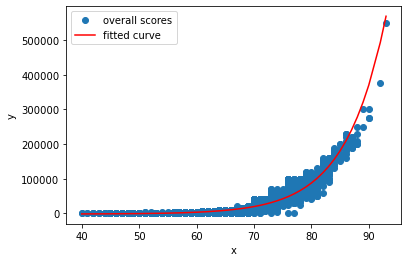

In [93]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return np.exp(a*x) + b

x = df_no_zero['overall']
y = df_no_zero['wage_eur']

plt.plot(x, y, 'o', label='overall scores')

popt, pcov = curve_fit(func, x, y)
print(popt)

plt.plot(x, func(x, *popt), 'r', label='fitted curve')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

With the above a = 1.42531322e-01; and b = -2.08691531e+03, thus, we can use this to predict the null values for 'wage_eur'.

In [94]:
df[df['wage_eur'] == 0]['wage_eur'] = np.exp(1.42531322e-01*df[df['wage_eur'] == 0]['overall']) + -2.08691531e+03

C:\Users\keroy\AppData\Local\Temp/ipykernel_12032/2891267181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['wage_eur'] == 0]['wage_eur'] = np.exp(1.42531322e-01*df[df['wage_eur'] == 0]['overall']) + -2.08691531e+03


In [95]:
len(df[df['wage_eur'] == 0])

239

In [96]:
df['wage_eur'].replace(0, np.exp(1.42531322e-01*df['overall']) + -2.08691531e+03, inplace=True)

ValueError: Series.replace cannot use dict-value and non-None to_replace

As the above causes an error, we will replace 0 with null value and use fillna to fill up the null values.

In [98]:
df['wage_eur'].replace(0, np.NaN, inplace=True)

In [99]:
df[df.columns[df.isnull().any()]].isnull().sum()

wage_eur    239
dtype: int64

In [100]:
df['wage_eur'] = df['wage_eur'].fillna(np.exp(1.42531322e-01*df['overall']) + -2.08691531e+03)

In [101]:
# to check that null values have been replaced

df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [102]:
df['wage_eur'].describe()

count     16155.000000
mean      13286.579418
std       23516.120557
min        -842.319507
25%        2000.000000
50%        5000.000000
75%       10000.000000
max      550000.000000
Name: wage_eur, dtype: float64

The above exponential model cannot be accepted as it produces a negative wage which is illogical.

Below is an attempt to use np.ployfit function to fit the seemingly exponential r/s between 'overall' and 'wage_eur'.

[   2353.15090792 -136828.22071039]


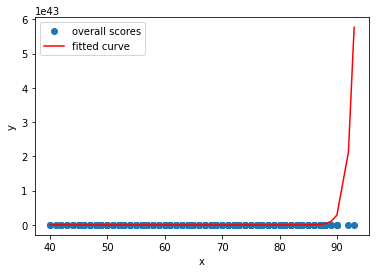

In [104]:
x = df_no_zero['overall']
y = df_no_zero['wage_eur']

curve_fit = np.polyfit(x, y, 1)
print(curve_fit)

plt.plot(x, y, 'o', label='overall scores')

plt.plot(x, (-136828.22071039 + (2353.15090792*np.exp(x))), 'r', label='fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

With the little experiment above, it shows that the exponential models are unable to predict the players' wages. Hence, it might be better to replace the wages and value based on the player's profile.

To do so, we need to find similar profiles and use those values as a proxy. A possible way could be using k-nearest neighbour.